<h2 align="center">Assignment 2 - Classification with MNIST KNN</h2>

For this assignment you will implement several KNN classifiers on the MNIST data set. Create a Jupyter notebook that goes through each part of the assignment and presents evidence and analysis for your results. Submit your notebook file and a PDF of your notebook.

## Importing packages

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import timeit
import timeit

# Import warnings
import warnings 
warnings.filterwarnings('ignore')

# Import the package mnist from keras
from keras.datasets import mnist

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn import metrics
from sklearn import model_selection

Using TensorFlow backend.


## About the MNIST Dataset

 MNIST is a whole bunch of images of handwritten digits that is considered to be one of the best dataset that used as a starter to learn about machine learning. These data do not require any further processing as they are already cleaned. 
The dataset consists of 60000 training images and 10000 testing images of handwritten digits for buliding our models. This  The MNIST dataset by default is available in keras package. Lets just download the data.

## Loading the data

In [2]:
# Load pre-shuffled MNIST data into train and test sets
(trainX, trainY), (testX, testY) = mnist.load_data()

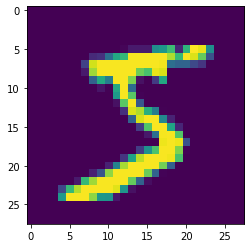

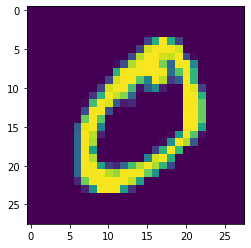

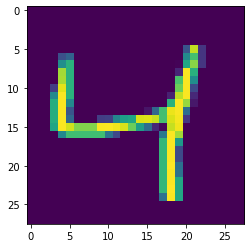

In [3]:
# Print the first three images in the training set
for i in range(3):
    plt.imshow(trainX[i])
    plt.show()

We have the number 5 as first image in the training set. We are sure that we have our data in tact.

It is always helpful when you are working with computer vision problem to plot the data before doing any algorithm work. It's a quick sanity check that can prevent easily avoidable mistakes such as misinterpreting the data dimensions.

## Preprocessing

Since that we have loaded the dataset lets have a look at the shape of the dataset that say how many images we have in our data.

In [4]:
# Shape of the Image feature/pixel value
print(trainX.shape)
print(testX.shape)

(60000, 28, 28)
(10000, 28, 28)


So it's appear that there are 60,000 sample of images in the training set and 10000 images on the test set. Each and every images are of size 28*28 pixels.

But we have a problem here. Having the images as array shape that representing the image pixel ie) (No of images, height, width) is not going to help us for the KNN alogithum feature representation. We need to reshape it in to the following format.

(No of images, width * height)

Lets do that.

In [5]:
# Reshaping the image feature
X_train = trainX.reshape(trainX.shape[0], trainX.shape[1] * trainX.shape[1])
X_test = testX.reshape(testX.shape[0], testX.shape[1] * testX.shape[1])

In [6]:
# Verifying the reshaping 
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


Thus we have reshaped the image properly. Just to be sure that we didn't loose any information while doing the reshaping. Let revert one of the image to old shape and try to print the image and see whether we are able to see it or not.

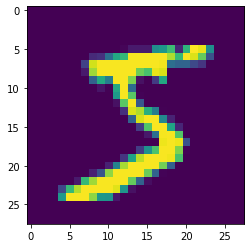

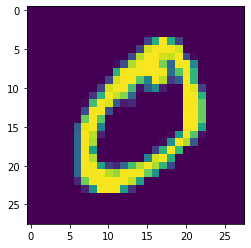

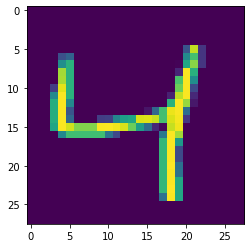

In [7]:
# Plot the first image in the train set
for i in range(3):
    plt.imshow(X_train[i].reshape(28, 28))
    plt.show()

Thus it proves that we have converted our X feature vectors of train and test properely.

Now that being done. Let us move our focus over to the labels for images which says what the number in the image is by checking the shape of the numpy array.

In [8]:
# Print the shape of the array that contains the image labels
print(trainY.shape)
print(testY.shape)

(60000,)
(10000,)


We will reshape the label arrays to shape (length of labels, 1) in order to have ease access while doing computation in the KNN algorithm.

In [9]:
# Reshape the label array
y_train = trainY.reshape(len(trainY), 1)
y_test = testY.reshape(len(testY), 1)

# Check the shape of reshaped label
print(y_train.shape)
print(y_test.shape)

(60000, 1)
(10000, 1)


And here we are reshaped our label perfectly as required. In order to handle the code neat and to provide reusablity fo the code, I have coded everything in a object oriendted class object. 

## Question 1

In [10]:
#reducing training data size to decrease computational time
X_train =X_train[:1000]
y_train = y_train[:1000]

(10 pts) Implement a 1-nearest neighbor classifier that considers the image pixels to be one long feature vector. The vector will be 28*28 = 784-dimensions long (one feature for each pixel in the image). Do not do any scaling or normalization on the pixel values. Present the testing error for each digit in a table.

As we are allowed to use knn from sklearn, here I am using KNN classifier directly for 1 nearest neighbor.

In [11]:
# Nearest Neighbor object creation
knn = KNeighborsClassifier(n_neighbors=1)
# Fit the model
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

### Predict on the test set

As we have the class object and fitted our model. Lets try to predict the images in the testing set using predict() . We will try to record the time it took to predict the test set also.

In [12]:
# Store the starting time for query time computation
start_time = timeit.default_timer()

# Make prediction on the test set
pred1 = knn.predict(X_test)

# Print the Query time
print("Query time:", round(timeit.default_timer() - start_time, 4), "Seconds")

Query time: 13.4059 Seconds


This is query time after reducing data size. but query time for this function call to make the prediction was more than 10 minutes with 60000 training data. This is really long time. So, each and every query is going to take longer time. later I fixed it by reducing training data size 

### Accuracy and error rate

Though we have predicted the test set. We need to know how good is the model by measuring some metrics. I am going to find the accuracy and error rate of the model to see how well it have performed.

In [13]:
s1= knn.score(X_train,y_train)
s2= knn.score(X_test,y_test)
print('Accuracy of KNN classifiar on training set: {:.2f}'.format(s1))
print('Accuracy of KNN classifiar on test set: {:.2f}'.format(s2))
print('The error rate of the model is : {:.2f}'.format(1-s2))

Accuracy of KNN classifiar on training set: 1.00
Accuracy of KNN classifiar on test set: 0.87
The error rate of the model is : 0.13


Accuracy of KNN classifiar on training set: 1.00
Accuracy of KNN classifiar on test set: 0.87, and error rate of this model is 0.13.
This calculation takes more than 30 min to get these results. woops, my computer is getting reallly hot. I know !



### Confusion Matrix

Confusion Matrix help us understand the model performance by provinding insights on how well the model performed on each digits, and where it is strugling to make the prediction.

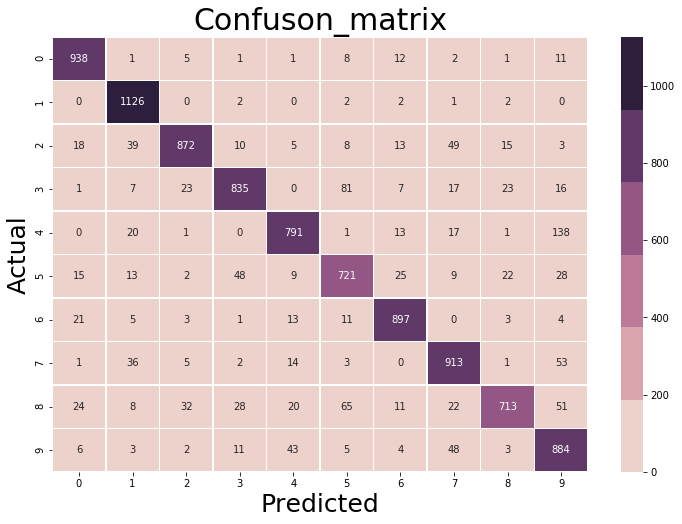

In [14]:
# Create and show the Confusion matrix plot
# make confusion matrix
results = confusion_matrix(y_test, pred1)
results
#create DataFrame
df_cm = pd.DataFrame(results, index = range(10),
                  columns = range(10))
plt.figure(figsize = (12,8))
sns.heatmap(df_cm,annot=True, annot_kws={"size": 10}, fmt = "d", linewidths=.5,cmap = sns.cubehelix_palette(),)
plt.title('Confuson_matrix',fontsize = 30)
# Set X and Y labels and it font size
plt.xlabel("Predicted", fontsize = 25)
plt.ylabel("Actual", fontsize = 25)
plt.show()

From the confusion matrix, we can say that

* The diagonal of the confusion matrix indicates our model is good enough to make correct prediction.
* Digit 1 has more chances to be correctly predicted.
* Our model has identified 4 as 9, so not so good in predicting 4.
* In addition, we have 2 identified as 7,  7 idneitfied as 1 and 8 as 3 and 5.

This makes sense as the model is confused in identifying similar shape digits.

### Testing error on each digit

Now lets see the testing error on each digits and see whether there is something interesting out there for us.

In [15]:
from sklearn import metrics
print(metrics.classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       980
           1       0.90      0.99      0.94      1135
           2       0.92      0.84      0.88      1032
           3       0.89      0.83      0.86      1010
           4       0.88      0.81      0.84       982
           5       0.80      0.81      0.80       892
           6       0.91      0.94      0.92       958
           7       0.85      0.89      0.87      1028
           8       0.91      0.73      0.81       974
           9       0.74      0.88      0.80      1009

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [16]:
Accuracy = [92, 90, 92 ,89, 88, 80, 91, 85, 91, 74]
error_list = [8, 10, 8, 11, 12, 10, 9, 15, 9, 26]
labels =[0,1,2,3,4,5,6,7,8,9]
df = pd.DataFrame({"Label": labels, "Error (%)": error_list, 
                                  "Accuracy (%)": [(100 - error) for error in error_list]})
df

,Label,Error (%),Accuracy (%)
0,0,8,92
1,1,10,90
2,2,8,92
3,3,11,89
4,4,12,88
5,5,10,90
6,6,9,91
7,7,15,85
8,8,9,91
9,9,26,74


Accuracy of the model is low because of selecting only 1000 data out of 60000. I have run query time and classification with 60000 data. There, I got around 10 min query time and better classificatio report.

## Problem 2
(10 pts) Implement a KNN leave-one-out approach and test values of K from 1 to 20. Plot the leave-one-out error vs. K. Present the testing error for best value of K for each digit in a table. (If you are running into time problems using all 60,000 data points for leave-one-out, feel free to randomly sample the training set to estimate the best K.)

In MNIST data set training and test data already separated and applying leave-one out approach in this whole data set is creating computational problem. The method used to split data using one-leaveout is following. 

X = X_train
y = y_train
loo = LeaveOneOut()
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
 Here, i am not splitting data further to save computauional time but I will find the best value of k using leave one out approach as follows:

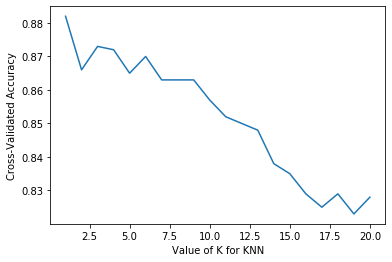

k-score for k= 1 to 20 : [0.882, 0.866, 0.873, 0.872, 0.865, 0.87, 0.863, 0.863, 0.863, 0.857, 0.852, 0.85, 0.848, 0.838, 0.835, 0.829, 0.825, 0.829, 0.823, 0.828]


In [17]:
#implementing KNN leave-one-out approach and test values of K from 1 to 20
k_range = range(1, 21)
k_scores = []# use iteration to caclulator different k in models, then return the average accuracy 
#implementing KNN leave-one-out approach and test values of K from 1 to 20
for k in k_range:
    loocv = model_selection.LeaveOneOut()
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,X_train,y_train, cv= loocv, scoring='accuracy') 
    k_scores.append(scores.mean())# plot to see clearly                         
plt.figure()
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()
print('k-score for k= 1 to 20 :',k_scores)

If I take even 10000 training data, the above step takes more than two hours. Then, I took just 1000 data from 60000 by doing X_train = Xtrain[:1000]. Actually performing one-leave-out approach is really difficult to perform if training data are more than 100.
From above graph and k-score, the best knn is predicting well when knn =1. <strong>Before doing this I splitted data using leave one out approach with 60,000 training data and found the best value of k was 3. It took hours to get the results<strong> 

In [18]:
#fit the model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [19]:
#make prediction using fitted model
pred2 = knn.predict(X_test)

In [20]:
#print classification report on test data
print(metrics.classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       980
           1       0.82      0.99      0.90      1135
           2       0.90      0.82      0.86      1032
           3       0.86      0.86      0.86      1010
           4       0.85      0.81      0.83       982
           5       0.84      0.78      0.81       892
           6       0.92      0.93      0.93       958
           7       0.88      0.89      0.88      1028
           8       0.94      0.69      0.80       974
           9       0.77      0.85      0.81      1009

    accuracy                           0.86     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000



In [21]:
Accuracy = [89, 82, 90 ,86, 85, 84, 92, 88, 94, 77]
error_list = [11, 18, 10, 14, 15, 16, 8, 12, 6, 33]
labels =[0,1,2,3,4,5,6,7,8,9]
df = pd.DataFrame({"Label": labels, "Error (%)": error_list, 
                                  "Accuracy (%)": [(100 - error) for error in error_list]})
df

,Label,Error (%),Accuracy (%)
0,0,11,89
1,1,18,82
2,2,10,90
3,3,14,86
4,4,15,85
5,5,16,84
6,6,8,92
7,7,12,88
8,8,6,94
9,9,33,67


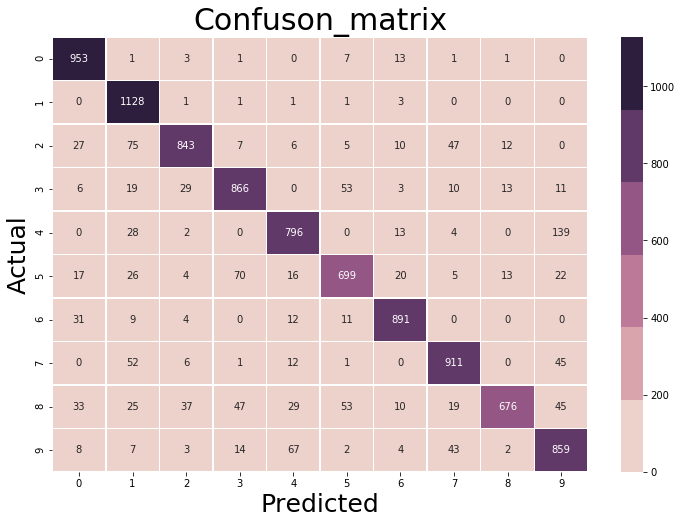

In [22]:
# Create and show the Confusion matrix plot
# make confusion matrix
results = confusion_matrix(y_test, pred2)
results
#create DataFrame
df_cm = pd.DataFrame(results, index = range(10),
                  columns = range(10))
plt.figure(figsize = (12,8))
sns.heatmap(df_cm,annot=True, annot_kws={"size": 10}, fmt = "d", linewidths=.5,cmap = sns.cubehelix_palette(),)
plt.title('Confuson_matrix',fontsize = 30)
# Set X and Y labels and it font size
plt.xlabel("Predicted", fontsize = 25)
plt.ylabel("Actual", fontsize = 25)
plt.show()

From the confusion matrix, we can say that

* The diagonal of the confusion matrix indicates our model is good enough to make correct prediction.
* Digit 1 has more chances to be correctly predicted as before.

## Feature Transformation Class

This class is a combination of varaible and functions that can be used to transform the feature using strides over the images and binning the each strides with summing, averaging, max , min pooliong over the images.

In [23]:
class FeatureTransformation:
    """ Transforms the features 
    
    Feature of the data is transformed by mainly taking the strides of n
    and computing the summing, averaging, max pooling, min pooling of 
    the features. Basicaly it is the downsample of the whole data
    
    Arguments:
        None
    """
    
    def __init__(self):
        pass
    
    def strided_rescale(self, g, bin_fac, binning):
        """ Rescale the data with strides and type of binning
        
        Takes the run over the image data using strides of n and 
        shrinks each strides depending on the binning method passed.
        
        Arguments:
            g: Data of the image in the feature vectors
            bin_fac: Represent the strides to consider(strides * strides)
            binning: Type of binning to apply {sum, max, min, others will 
                compute average of strides}
            
        Returns:
            Shrinked image of feature vector
        """
        # Get the strides of the whole image
        strided = np.lib.stride_tricks.as_strided(g,
            shape=(g.shape[0]//bin_fac, g.shape[1]//bin_fac, bin_fac, bin_fac),
            strides=((g.strides[0]*bin_fac, g.strides[1]*bin_fac)+g.strides))
        # Check the binning method and compute thte stride accordingly
        if binning is "sum":
            return strided.sum(axis=-1).sum(axis=-1)
        elif binning is "max":
            return strided.max(axis=-1).max(axis=-1)
        elif binning is "min":
            return strided.min(axis=-1).max(axis=-1)
        else:
            return strided.mean(axis=-1).mean(axis=-1)
    
    def down_sample(self, data, n, binning = None):
        """ Downsample the data by n
        
        Computes the nthe feature downsample or downsamples by using 
        techniques such as summing, binning, max pooling, min pooling 
        and average
        
        Arguments:
            data: Data of the image in the feature vectors
            n: Represent the strides to consider(strides * strides)
            binning: Type of binning to apply
            
        Returns:
            Downsampled/Shrinked image of feature vector
        """
        # Check for binning downsample the image if the binning is none
        # else do smart downsampling by passing it to the strides()
        if binning is None:
            # get the index
            index = [i-1 for i in np.arange(n, data.shape[1] + 1, n)]
            # Downsample the image
            down_sampled = np.array([data[:, i] for i in index])
            return down_sampled.T
        else:
            # Get the new image side
            new_side = int(data.shape[1] / n)
            # Intiualize the strides for storing the results
            strided = np.zeros((data.shape[0], new_side, new_side))
            # Compute the strides and store the values
            for i in range(data.shape[0]):
                strided[i] = self.strided_rescale(data[i], n, binning)
            return strided

## Problem 3:
(20 pts) Implement a function that downsamples the image by a factor of n. For example, if n is 4 then you will sample every 4th pixel (feature) in the 784-dimension feature vector. Repeat the KNN leave-one-out experiment with at least 4 different values of n. Comment on the testing results and the query time of the classifier.

For this question, I am going to apply downsamples for n = 4, 8, 16, 32 as four different values on the 784 dimension feature vector.

- n = 4
- n = 8
- n = 16
- n = 32

Let just get started by fitting the model with leave one out and find out which k suits for which nth downsample feature vectors.



In [24]:
# Creating the Feature Transformation class object
transformation = FeatureTransformation()

In [25]:
# defining function that uses oneleave out model and calculates query time and cross-validation score for k=1 to 20
def querytime_scores(X_train_ds,n):
    start_time = timeit.default_timer()
    knn = KNeighborsClassifier()
    X_train_ds = transformation.down_sample(X_train, n)
    # for k 1 to 20
    k_range = range(1, 21)
    k_scores = [] 
#implementing KNN leave-one-out approach and test values of K from 1 to 20
    for k in k_range:
        loocv = model_selection.LeaveOneOut()
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_ds, y_train)    
        time1 = round(timeit.default_timer() - start_time, 4)
        scores = cross_val_score(knn,X_train_ds,y_train, cv= loocv, scoring='accuracy') 
        k_scores.append(scores.mean())
    return print('Query time for N=',n,':',time1,'seconds(s)''\n''k_scores for k= 1to 20 are:', k_scores)

In [26]:
#query time for downssaple n= 4 and cross validation score 
querytime_scores(X_train,4)

Query time for N= 4 : 255.6308 seconds(s)
k_scores for k= 1to 20 are: [0.847, 0.819, 0.837, 0.827, 0.82, 0.82, 0.817, 0.811, 0.805, 0.798, 0.797, 0.795, 0.794, 0.791, 0.787, 0.79, 0.787, 0.781, 0.779, 0.781]


In [27]:
#query time for downssaple n= 8 and cross validation score 
querytime_scores(X_train,8)

Query time for N= 8 : 150.0802 seconds(s)
k_scores for k= 1to 20 are: [0.833, 0.799, 0.833, 0.824, 0.821, 0.828, 0.82, 0.806, 0.806, 0.814, 0.801, 0.803, 0.792, 0.797, 0.79, 0.788, 0.779, 0.778, 0.777, 0.774]


In [28]:
#query time for downssaple n= 16 and cross validation score 
querytime_scores(X_train,16)

Query time for N= 16 : 97.0036 seconds(s)
k_scores for k= 1to 20 are: [0.713, 0.695, 0.713, 0.724, 0.707, 0.719, 0.722, 0.713, 0.713, 0.716, 0.714, 0.715, 0.717, 0.724, 0.712, 0.709, 0.711, 0.711, 0.71, 0.707]


In [29]:
#query time for downssaple n= 32 and cross validation score 
querytime_scores(X_train,32)

Query time for N= 32 : 70.0752 seconds(s)
k_scores for k= 1to 20 are: [0.498, 0.495, 0.51, 0.515, 0.532, 0.526, 0.535, 0.539, 0.541, 0.544, 0.532, 0.545, 0.542, 0.536, 0.527, 0.526, 0.53, 0.533, 0.53, 0.528]


## Bar-plot Query time vs downsampling

In [30]:
# So, I can make a list of all above query time corresponding to values of n
querytime = [255, 150, 97, 70]
downsamples =[4, 8, 16, 32]

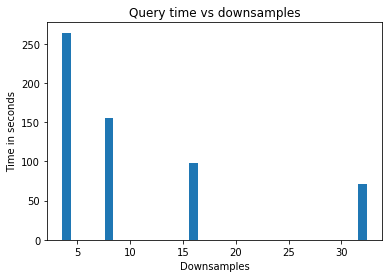

In [31]:
#plot query time vs sampling
plt.bar(downsamples,querytime)
plt.xlabel('Downsamples')
plt.ylabel('Time in seconds')
plt.title('Query time vs downsamples')
plt.show()

This makes sense. The query time has been decreased with increasing downsampling.

Now, I want to see how the model performance and how it is doing on test data, I am just calculating classifiaction report of n= 4 

## Calculating Classification report on testing data

In [32]:
###########     N = 4    ###########
print('The Calssification report on testing data with n =4 \n')
X_train_ds1 = transformation.down_sample(X_train, 4)
knn.fit(X_train_ds1, y_train)
X_test_ds1 = transformation.down_sample(X_test, 4)
pred=knn.predict(X_test_ds1)
testing_report =metrics.classification_report(y_test, pred)
print(testing_report)

The Calssification report on testing data with n =4 

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       980
           1       0.60      0.99      0.75      1135
           2       0.86      0.72      0.78      1032
           3       0.84      0.72      0.77      1010
           4       0.74      0.74      0.74       982
           5       0.81      0.65      0.72       892
           6       0.86      0.84      0.85       958
           7       0.83      0.81      0.82      1028
           8       0.88      0.57      0.69       974
           9       0.76      0.73      0.74      1009

    accuracy                           0.78     10000
   macro avg       0.80      0.77      0.77     10000
weighted avg       0.79      0.78      0.77     10000



In [33]:
# ###########     N = 8    ###########
print('The Calssification report on testing data with n =8 \n')

X_train_ds2 = transformation.down_sample(X_train, 8)
knn.fit(X_train_ds2, y_train)
X_test_ds2 = transformation.down_sample(X_test, 8)
pred=knn.predict(X_test_ds2)
testing_report =metrics.classification_report(y_test, pred)
print(testing_report)

The Calssification report on testing data with n =8 

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       980
           1       0.62      0.99      0.76      1135
           2       0.87      0.73      0.79      1032
           3       0.80      0.73      0.76      1010
           4       0.74      0.73      0.73       982
           5       0.80      0.64      0.71       892
           6       0.84      0.85      0.85       958
           7       0.80      0.80      0.80      1028
           8       0.87      0.56      0.68       974
           9       0.73      0.71      0.72      1009

    accuracy                           0.77     10000
   macro avg       0.79      0.77      0.77     10000
weighted avg       0.79      0.77      0.77     10000



In [34]:
# ###########     N = 16    ###########
print('The Calssification report on testing data with n =16 \n')

X_train_ds3 = transformation.down_sample(X_train, 16)
knn.fit(X_train_ds3, y_train)
X_test_ds3 = transformation.down_sample(X_test, 16)
pred=knn.predict(X_test_ds3)
testing_report =metrics.classification_report(y_test, pred)
print(testing_report)

The Calssification report on testing data with n =16 

              precision    recall  f1-score   support

           0       0.76      0.88      0.82       980
           1       0.62      0.95      0.75      1135
           2       0.75      0.61      0.67      1032
           3       0.64      0.57      0.61      1010
           4       0.61      0.61      0.61       982
           5       0.61      0.44      0.51       892
           6       0.74      0.78      0.76       958
           7       0.64      0.70      0.67      1028
           8       0.70      0.43      0.53       974
           9       0.54      0.56      0.55      1009

    accuracy                           0.66     10000
   macro avg       0.66      0.65      0.65     10000
weighted avg       0.66      0.66      0.65     10000



In [35]:
# ###########     N = 32    ###########

print('The Calssification report on testing data with n =32 \n')
X_train_ds4 = transformation.down_sample(X_train, 4)
knn.fit(X_train_ds4, y_train)
X_test_ds4 = transformation.down_sample(X_test, 4)
pred=knn.predict(X_test_ds4)
testing_report =metrics.classification_report(y_test, pred)
print(testing_report)

The Calssification report on testing data with n =32 

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       980
           1       0.60      0.99      0.75      1135
           2       0.86      0.72      0.78      1032
           3       0.84      0.72      0.77      1010
           4       0.74      0.74      0.74       982
           5       0.81      0.65      0.72       892
           6       0.86      0.84      0.85       958
           7       0.83      0.81      0.82      1028
           8       0.88      0.57      0.69       974
           9       0.76      0.73      0.74      1009

    accuracy                           0.78     10000
   macro avg       0.80      0.77      0.77     10000
weighted avg       0.79      0.78      0.77     10000



Above scores shows how well the model is performig on testing data for different downsampling.

## Question 4

(20 pts) Implement a function that smart downsamples the image by binning nearby pixels. For example, if n is 4 then the 28x28 image will be binned down to a 7x7 image by summing each 4x4 block in the image. Repeat the KNN leave-one-out experiment with at least 4 different values of n. Comment on the testing results and the query time of the classifier.



For this question, I am taking the orignal image numpy array which is in shape (60000, 28, 28) --> (No of images, height, width) and than apply the n strides over it to get the output images of shape (60000, 7, 7). Let just do that first now. We need to do this for both the test and train images. 

I am going to apply downsamples for n = 2, 3, 4, 5 as four different values of strides for binning them together.

In [36]:
# Creating the Feature Transformation class object
knn = KNeighborsClassifier()
transformation = FeatureTransformation()

# Calling the downsample() to do binning using summing
trainX_sds = transformation.down_sample(trainX, 2, binning = "sum")
testX_sds = transformation.down_sample(testX, 2, binning = "sum")

### Original Image

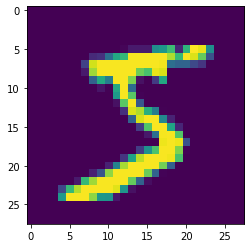

In [37]:
# Plot the image
plt.imshow(trainX[0])

### Aftrer Stride of 2

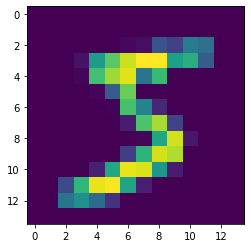

In [38]:
# Plot the image
plt.imshow(trainX_sds[0])

In [39]:
# Convert the shape of Train and Test set after strides application
X_train_sds = trainX_sds.reshape(trainX_sds.shape[0], trainX_sds.shape[1] * trainX_sds.shape[1])

# Print the changed shape
print(X_train_sds.shape)

(60000, 196)


X_test_sds = testX_sds.reshape(testX_sds.shape[0], testX_sds.shape[1] * testX_sds.shape[1])
print(X_test_sds.shape)

In [40]:
X_train_sds= X_train_sds[:1000]


## It will use the latest fitted one-leave-out knn

In [41]:
###########     N = 2    ###########
# Store the starting time for query time computation
start_time = timeit.default_timer()

# Fit the model in the leave out CV method
knn.fit(X_train_sds, y_train)

# Print the Query time
time1 = round(timeit.default_timer() - start_time, 4)
print("Query time for N = 2:", time1, "second(s)")



###########     N = 3    ###########
# Calling the downsample() to do binning using summing
trainX_sds = transformation.down_sample(trainX, 3, binning = "sum")
testX_sds = transformation.down_sample(testX, 3, binning = "sum")

# Convert the shape of Train and Test set after strides application
X_train_sds = trainX_sds.reshape(trainX_sds.shape[0], trainX_sds.shape[1] * trainX_sds.shape[1])
X_train_sds= X_train_sds[:1000]

# Store the starting time for query time computation
start_time = timeit.default_timer()

# Fit the model in the leave out CV method
knn.fit(X_train_sds, y_train)

# Print the Query time
time2 = round(timeit.default_timer() - start_time, 4)
print("Query time for N = 3:", time2, "second(s)")



###########     N = 4    ###########
# Calling the downsample() to do binning using summing
trainX_sds = transformation.down_sample(trainX, 4, binning = "sum")
testX_sds = transformation.down_sample(testX, 4, binning = "sum")

# Convert the shape of Train and Test set after strides application
X_train_sds = trainX_sds.reshape(trainX_sds.shape[0], trainX_sds.shape[1] * trainX_sds.shape[1])
X_train_sds= X_train_sds[:1000]

# Store the starting time for query time computation
start_time = timeit.default_timer()

# Fit the model in the leave out CV method
knn.fit(X_train_sds, y_train)

# Print the Query time
time3 = round(timeit.default_timer() - start_time, 4)
print("Query time for N = 4:", time3, "second(s)")


###########     N = 5    ###########
# Calling the downsample() to do binning using summing
trainX_sds = transformation.down_sample(trainX, 5, binning = "sum")
testX_sds = transformation.down_sample(testX, 5, binning = "sum")

# Convert the shape of Train and Test set after strides application
X_train_sds = trainX_sds.reshape(trainX_sds.shape[0], trainX_sds.shape[1] * trainX_sds.shape[1])
X_train_sds= X_train_sds[:1000]

# Store the starting time for query time computation
start_time = timeit.default_timer()

# Fit the model in the leave out CV method
knn.fit(X_train_sds, y_train)

# Print the Query time
time4 = round(timeit.default_timer() - start_time, 4)
print("Query time for N = 5:", time4, "second(s)")


Query time for N = 2: 0.0175 second(s)
Query time for N = 3: 0.0093 second(s)
Query time for N = 4: 0.005 second(s)
Query time for N = 5: 0.0048 second(s)


In [42]:
# So, I can make a list of all above query time corresponding to values of n
querytime = [0.0174, 0.0093, 0.005, 0.0048 ]
downsamples =[2, 3, 4, 5]

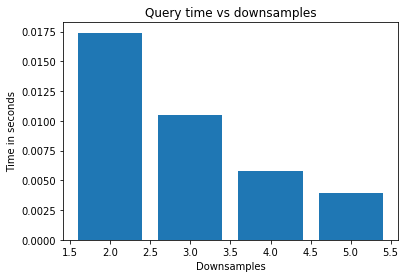

In [43]:
#plot query time vs sampling
plt.bar(downsamples,querytime)
plt.xlabel('Downsamples')
plt.ylabel('Time in seconds')
plt.title('Query time vs downsamples')
plt.show()

This makes sense. The query time has been decreased with increasing downsampling. Further in this case query time much lower than previous query times.

## Calculating Classification report on testing data

In [44]:
# Calling the downsample() to do binning using summing
trainX_sds = transformation.down_sample(trainX, 2, binning = "sum")
testX_sds = transformation.down_sample(testX, 2, binning = "sum")

# Convert the shape of Train and Test set after strides application
X_train_sds = trainX_sds.reshape(trainX_sds.shape[0], trainX_sds.shape[1] * trainX_sds.shape[1])

X_train_sds= X_train_sds[:1000]


print('The Calssification report on testing data with n =2 \n')
knn.fit(X_train_sds, y_train)
X_test_sds = testX_sds.reshape(testX_sds.shape[0], testX_sds.shape[1] * testX_sds.shape[1])


predx=knn.predict(X_test_sds)
testing_report =metrics.classification_report(y_test, predx)
print(testing_report)

The Calssification report on testing data with n =2 

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       980
           1       0.85      0.99      0.92      1135
           2       0.94      0.82      0.88      1032
           3       0.90      0.88      0.89      1010
           4       0.86      0.81      0.83       982
           5       0.86      0.83      0.84       892
           6       0.91      0.94      0.93       958
           7       0.88      0.88      0.88      1028
           8       0.94      0.77      0.85       974
           9       0.76      0.87      0.81      1009

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [45]:
# Calling the downsample() to do binning using summing
trainX_sds = transformation.down_sample(trainX, 3, binning = "sum")
testX_sds = transformation.down_sample(testX, 3, binning = "sum")

# Convert the shape of Train and Test set after strides application
X_train_sds = trainX_sds.reshape(trainX_sds.shape[0], trainX_sds.shape[1] * trainX_sds.shape[1])

X_train_sds= X_train_sds[:1000]


print('The Calssification report on testing data with n =3 \n')
knn.fit(X_train_sds, y_train)
X_test_sds = testX_sds.reshape(testX_sds.shape[0], testX_sds.shape[1] * testX_sds.shape[1])


predx=knn.predict(X_test_sds)
testing_report =metrics.classification_report(y_test, predx)
print(testing_report)

The Calssification report on testing data with n =3 

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       980
           1       0.88      0.99      0.93      1135
           2       0.95      0.84      0.89      1032
           3       0.90      0.84      0.87      1010
           4       0.87      0.81      0.84       982
           5       0.85      0.82      0.83       892
           6       0.92      0.93      0.92       958
           7       0.89      0.87      0.88      1028
           8       0.89      0.78      0.83       974
           9       0.75      0.89      0.81      1009

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [46]:
# Calling the downsample() to do binning using summing
trainX_sds = transformation.down_sample(trainX, 4, binning = "sum")
testX_sds = transformation.down_sample(testX, 4, binning = "sum")

# Convert the shape of Train and Test set after strides application
X_train_sds = trainX_sds.reshape(trainX_sds.shape[0], trainX_sds.shape[1] * trainX_sds.shape[1])

X_train_sds= X_train_sds[:1000]


print('The Calssification report on testing data with n =4 \n')
knn.fit(X_train_sds, y_train)
X_test_sds = testX_sds.reshape(testX_sds.shape[0], testX_sds.shape[1] * testX_sds.shape[1])


predx=knn.predict(X_test_sds)
testing_report =metrics.classification_report(y_test, predx)
print(testing_report)

The Calssification report on testing data with n =4 

              precision    recall  f1-score   support

           0       0.90      0.97      0.94       980
           1       0.88      0.99      0.93      1135
           2       0.94      0.85      0.89      1032
           3       0.89      0.84      0.86      1010
           4       0.81      0.73      0.77       982
           5       0.83      0.81      0.82       892
           6       0.88      0.89      0.89       958
           7       0.90      0.87      0.89      1028
           8       0.87      0.73      0.79       974
           9       0.69      0.85      0.76      1009

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000



In [47]:
# Calling the downsample() to do binning using summing
trainX_sds = transformation.down_sample(trainX, 5, binning = "sum")
testX_sds = transformation.down_sample(testX, 5, binning = "sum")

# Convert the shape of Train and Test set after strides application
X_train_sds = trainX_sds.reshape(trainX_sds.shape[0], trainX_sds.shape[1] * trainX_sds.shape[1])

X_train_sds= X_train_sds[:1000]


print('The Calssification report on testing data with n =5 \n')
knn.fit(X_train_sds, y_train)
X_test_sds = testX_sds.reshape(testX_sds.shape[0], testX_sds.shape[1] * testX_sds.shape[1])


predx=knn.predict(X_test_sds)
testing_report =metrics.classification_report(y_test, predx)
print(testing_report)

The Calssification report on testing data with n =5 

              precision    recall  f1-score   support

           0       0.86      0.91      0.89       980
           1       0.82      0.94      0.88      1135
           2       0.93      0.75      0.83      1032
           3       0.76      0.73      0.75      1010
           4       0.71      0.70      0.71       982
           5       0.76      0.72      0.74       892
           6       0.87      0.84      0.86       958
           7       0.76      0.75      0.75      1028
           8       0.75      0.72      0.73       974
           9       0.64      0.75      0.69      1009

    accuracy                           0.78     10000
   macro avg       0.79      0.78      0.78     10000
weighted avg       0.79      0.78      0.78     10000



Above scores shows how well the model is performig on testing data for different downsampling.

## Question 5

(10 pts) Run your smart downsampler at n = 28. Essentially, reduce each image down to 1 pixel by summing them all. The motivation here is that an '8' will obviously have more dark pixels than a '1' . Repeat the KNN leave-one-out experiment. Comment on the testing results and the query time of the classifier

So this question is similar to that of the previous qiestion where as instead of choosing the N value on our own, we need to use N = 28. Actually what we are doing is that just reducing the whole image into one single pixel by summming it and using that one single feature to make the prediction.

In [48]:
# Creating the Feature Transformation class object
transformation = FeatureTransformation()

# Calling the downsample() to do binning using summing
trainX_sds = transformation.down_sample(trainX, 28, binning = "sum")
testX_sds = transformation.down_sample(testX, 28, binning = "sum")

Let just view the original and image after feature transformation.

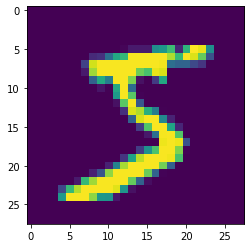

In [49]:
# Original Image
plt.imshow(trainX[0])

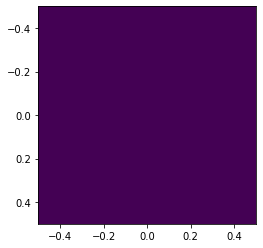

In [50]:
# After transformation
plt.imshow(trainX_sds[0])

This image represent just a single pixel. Now, our feature vector is just a single vector of 60000 rows.so, lets reshape the train image that is suitable for the KNN computation ie) in 2D array format.

In [51]:
# Convert the shape of Train and Test set after strides application
X_train_sds = trainX_sds.reshape(trainX_sds.shape[0], trainX_sds.shape[1] * trainX_sds.shape[1])

# Print the changed shape
print(X_train_sds.shape)

(60000, 1)


Thus we have our image data converted into the form (60000 * 1 matrix) that is suitable for the KNN algorithm. Let try to fit the model. 

In [52]:
# Again let us reduce the size of the data
X_train_sds =X_train_sds[:1000]

In [53]:
# Store the starting time for query time computation
start_time = timeit.default_timer()

# Fit the model in the leave out CV method
#our latest fitted knn is one leave out,so knn calls the latest knn
knn.fit(X_train_sds, y_train)

# Print the Query time
time1 = round(timeit.default_timer() - start_time, 4)
print("Query time:", time1, "second(s)")

Query time: 0.0027 second(s)


It's superfast in this case. Query time sufficiently low!

## Calculating Classification report on testing data

In [54]:
# Calling the downsample() to do binning using summing
trainX_sds = transformation.down_sample(trainX, 28, binning = "sum")
testX_sds = transformation.down_sample(testX, 28, binning = "sum")

# Convert the shape of Train and Test set after strides application
X_train_sds = trainX_sds.reshape(trainX_sds.shape[0], trainX_sds.shape[1] * trainX_sds.shape[1])

X_train_sds= X_train_sds[:1000]


print('The Calssification report on testing data with n =28 \n')
knn.fit(X_train_sds, y_train)
X_test_sds = testX_sds.reshape(testX_sds.shape[0], testX_sds.shape[1] * testX_sds.shape[1])


predx=knn.predict(X_test_sds)
testing_report =metrics.classification_report(y_test, predx)
print(testing_report)

The Calssification report on testing data with n =28 

              precision    recall  f1-score   support

           0       0.19      0.44      0.26       980
           1       0.42      0.69      0.52      1135
           2       0.14      0.18      0.16      1032
           3       0.11      0.09      0.09      1010
           4       0.13      0.09      0.11       982
           5       0.09      0.04      0.06       892
           6       0.10      0.07      0.08       958
           7       0.13      0.10      0.11      1028
           8       0.13      0.06      0.08       974
           9       0.16      0.11      0.13      1009

    accuracy                           0.20     10000
   macro avg       0.16      0.19      0.16     10000
weighted avg       0.16      0.20      0.17     10000



So, this model correctly predict 1 than other. for 3, prediction is poor.

## Question 6

(30 pts) Do a little research of your own and develop a feature transformation method that you then use with the KNN leave-one-out experiment. Describe your method in detail, using equations and figures as necessary. Someone should be able to reproduce your results with your description. Comment on the testing results and the query time of the classifier.

### Solution

MNIST data se has a bunch of images which are used to create a Handwritten recongition model for USPS to identify zipcodes in the letters.
It was carried out by one of the pioneering researcher in the field of Deep Learning, Dr. Yann Le Cun. DR. LeCun is widely known for his inventions and cutting edge research in the field of Convolution Neural Networks which is technique overall driving force for solving the Image recognition problem. 

So we decided to use one of the techniques which is used in the architechture of Convolution Neural Networks (CNN) called pooling. Its function is to progressively reduce the spatial size of the representation to reduce the amount of parameters and computation in the network, and hence to also control overfitting. The pooling methodology can be classified in two different ways. They are

- Max pooling: The maximum pixel value of the batch is selected.
- Min pooling: The minimum pixel value of the batch is selected.

But it is generally believed that by most of the researchers and by engineers in big firm that Max Pooling is by far better than Min and Sum Pooling because the values of the neighbourhood cells are not independent when the feature is present in the neighbourhood. As a result, linear summation makes no sense. <strong>And thus we are going to implement Max Pooling feature transformation for this question.</strong> Before heading on to the KNN, lets spend some time in learning what is Max Pooling in bit detail.

### Max Pooling

Max pooling is a sample-based discretization process. The objective is to down-sample an input representation (image, hidden-layer output matrix, etc.), reducing its dimensionality and allowing for assumptions to be made about features contained in the sub-regions binned.

This is done to in part to help over-fitting by providing an abstracted form of the representation. As well, it reduces the computational cost by reducing the number of parameters to learn and provides basic translation invariance to the internal representation.

Max pooling is done by applying a max filter to (usually) non-overlapping subregions of the initial representation.

Let's say we have a 4x4 matrix representing our initial input. 

Let's say, as well, that we have a 2x2 filter that we'll run over our input. We'll have a stride of 2 (meaning the (dx, dy) for stepping over our input will be (2, 2)) and won't overlap regions.


When we use it, the input image would be somewhat blurry or perhaps "ghostly". Say we have a neighbourhood of 4 cells, on which we perform pooling. If a feature is detected at the first cell, then it is less likely to be detected in the other 3 cells. If all that we are concerned with is whether the feature is present within this small neighbourhood, taking the average from the 4 cells would cause the output value to be lower than the actual value. 

### Max Pooling techniques on the image with strides of 2 * 2 and perform the procedure which I followed in the previous question to see what sort of outputs I am getting for this. Lets do it!

In [55]:
# Creating the Feature Transformation class object
transformation = FeatureTransformation()

# Calling the downsample() to do binning using summing
trainX_mp = transformation.down_sample(trainX, 2, binning = "max")
testX_mp = transformation.down_sample(testX, 2, binning = "max")

In [56]:
trainX_mp.shape

(60000, 14, 14)

Let just view the original and image after feature transformation.

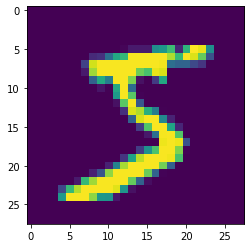

In [57]:
# Original Image
plt.imshow(trainX[0])

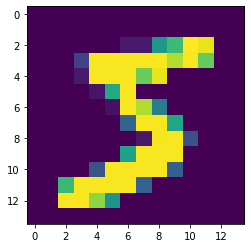

In [58]:
# After transformation
plt.imshow(trainX_mp[0])

We can see that the max pooling has kind of shaded the image which will help in the learning procedure. Let just do that by reshaping the train image that is suitable for the KNN computation ie) in 2D array format.

In [59]:
# Convert the shape of Train and Test set after strides application
X_train_mp = trainX_mp.reshape(trainX_mp.shape[0], trainX_mp.shape[1] * trainX_mp.shape[1])

# Print the changed shape
print(X_train_mp.shape)

(60000, 196)


Thus we have our image data converted into the form (60000, 196) matrix that is suitable for the KNN algorithm. Let try to fit the model.

In [60]:
X_train_mp= X_train_mp[:1000]

In [61]:
# Store the starting time for query time computation
start_time = timeit.default_timer()

# Fit the model in the leave out CV method
knn.fit(X_train_mp, y_train)

# Print the Query time
time = round(timeit.default_timer() - start_time, 4)
print("Query time:", time, "second(s)")


Query time: 0.0205 second(s)


## Calculating Classification report on testing data

In [62]:
# Calling the downsample() to do binning using summing
trainX_mp = transformation.down_sample(trainX, 2, binning = "max")
testX_mp = transformation.down_sample(testX, 2, binning = "max")

# Convert the shape of Train and Test set after strides application
X_train_mp = trainX_mp.reshape(trainX_mp.shape[0], trainX_mp.shape[1] * trainX_mp.shape[1])

X_train_mp= X_train_mp[:1000]


print('The Calssification report on testing data with n =28 \n')
knn.fit(X_train_mp, y_train)
X_test_mp = testX_mp.reshape(testX_mp.shape[0], testX_mp.shape[1] * testX_mp.shape[1])


predx=knn.predict(X_test_mp)
testing_report =metrics.classification_report(y_test, predx)
print(testing_report)

The Calssification report on testing data with n =28 

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       980
           1       0.86      0.99      0.92      1135
           2       0.95      0.85      0.90      1032
           3       0.90      0.85      0.87      1010
           4       0.89      0.73      0.80       982
           5       0.86      0.79      0.82       892
           6       0.92      0.94      0.93       958
           7       0.91      0.88      0.89      1028
           8       0.91      0.77      0.83       974
           9       0.70      0.91      0.79      1009

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000



The end !!

#### In this project, I spent a lot of time to run the code using original data but my computer shut off many times. So, I took a small part of data using  X_train= X_train[:1000]. So, I know my results will not be close to the real results but if we run this with 60000 data, I believe the result will make some sense.


Thank you !
